In [1]:
import pandas as pd

df = pd.read_csv("../Data/OnlineRetail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].apply(lambda date: 100 * date.year + date.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [3]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [4]:
df_rev = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_rev

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


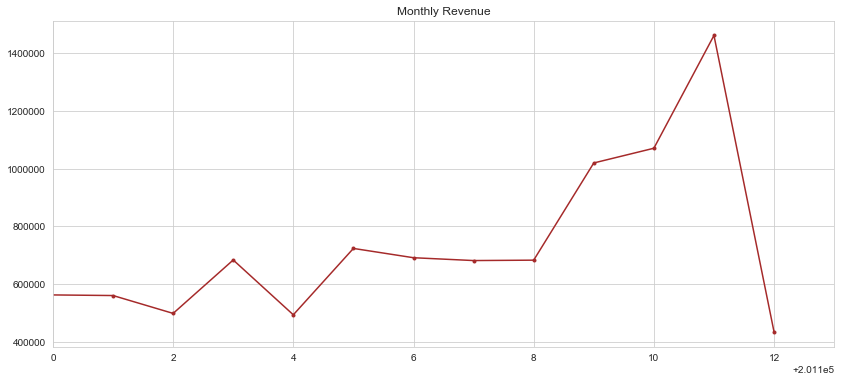

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))
plt.title("Monthly Revenue")
plt.plot(df_rev['InvoiceYearMonth'], df_rev['Revenue'], marker="o", markersize=3, color="brown")
plt.xlim(201100, 201113)
plt.show()

In [6]:
# pct_change => percent change
df_rev['MonthlyGrowth'] = df_rev['Revenue'].pct_change()
df_rev.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


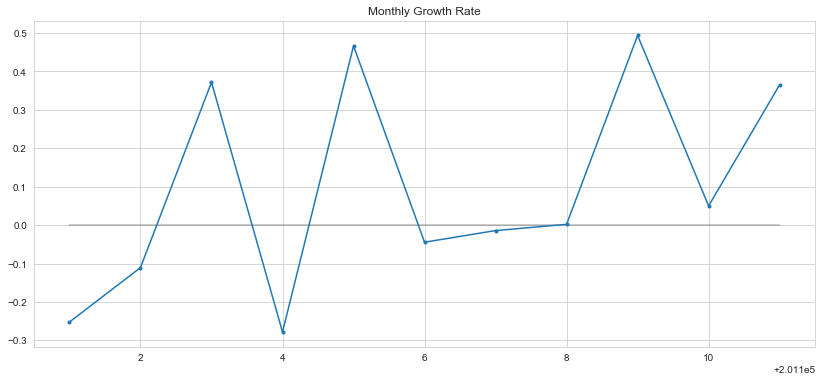

In [7]:
plt.figure(figsize=(14, 6))
plt.title("Monthly Growth Rate")
plt.plot([201101, 201111], [0, 0], color='black', linewidth=0.4)
plt.plot(df_rev.query("InvoiceYearMonth < 201112")["InvoiceYearMonth"], 
         df_rev.query("InvoiceYearMonth < 201112")["MonthlyGrowth"], marker=".", markersize=6)
plt.show()

In [8]:
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


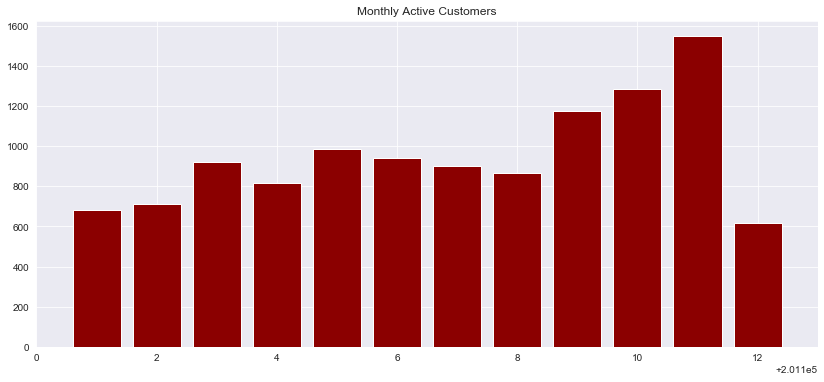

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))
plt.title("Monthly Active Customers")
plt.bar(df_monthly_active['InvoiceYearMonth'], df_monthly_active['CustomerID'], color="darkred")
plt.xlim(201100, 201113)
plt.show()

In [10]:
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].nunique().reset_index()
df_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,203
1,201101,170
2,201102,161
3,201103,237
4,201104,202
5,201105,201
6,201106,213
7,201107,188
8,201108,222
9,201109,237


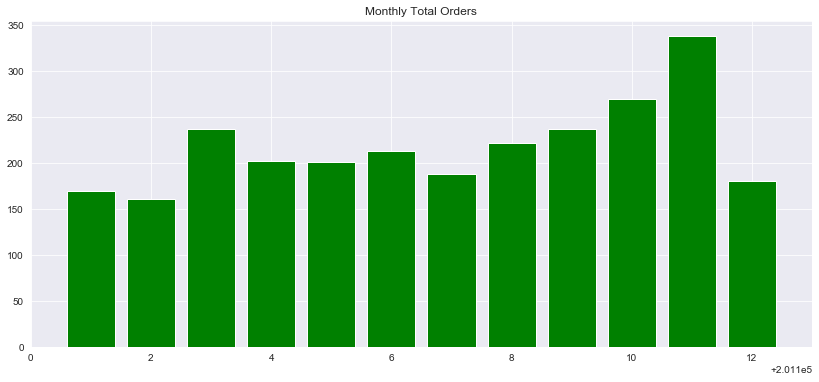

In [11]:
plt.figure(figsize=(14, 6))
plt.title("Monthly Total Orders")
plt.bar(df_monthly_sales['InvoiceYearMonth'], df_monthly_sales['Quantity'], color="green")
plt.xlim(201100, 201113)
plt.show()

In [12]:
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
df_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


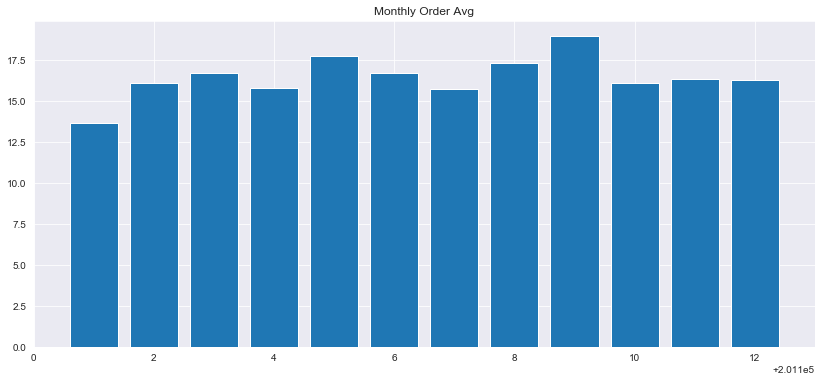

In [13]:
plt.figure(figsize=(14, 6))
plt.title("Monthly Order Avg")
plt.bar(df_monthly_order_avg['InvoiceYearMonth'], df_monthly_order_avg['Revenue'])
plt.xlim(201100, 201113)
plt.show()

In [14]:
df_min_purchase = df_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [15]:
df_min_purchase.columns = ['CustomerID', 'MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100 * date.year + date.month)
df_min_purchase

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [16]:
df_uk = pd.merge(df_uk, df_min_purchase, on='CustomerID')
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [17]:
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceYearMonth'] > df_uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [18]:
df_user_type_rev = df_uk.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum().reset_index()
df_user_type_rev

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


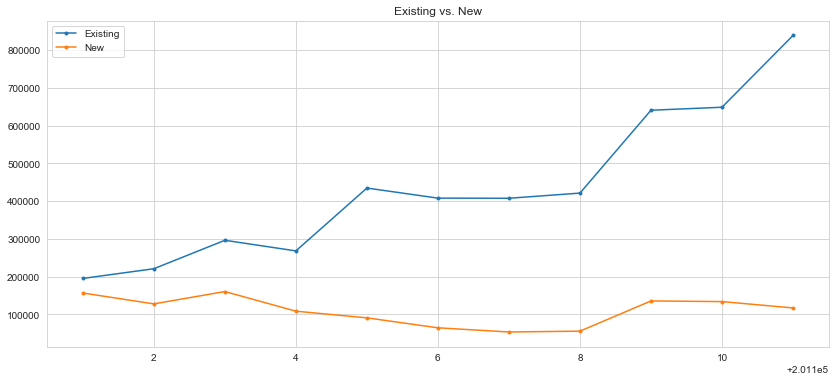

In [19]:
df_user_type_rev = df_user_type_rev.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")

sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))
plt.title("Existing vs. New")
plt.plot(df_user_type_rev[df_user_type_rev['UserType'] == 'Existing']['InvoiceYearMonth'], 
         df_user_type_rev[df_user_type_rev['UserType'] == 'Existing']['Revenue'], marker="o", markersize=3, 
         label="Existing")
plt.plot(df_user_type_rev[df_user_type_rev['UserType'] == 'New']['InvoiceYearMonth'],  
         df_user_type_rev[df_user_type_rev['UserType'] == 'New']['Revenue'], marker="o", markersize=3, label="New")
plt.legend()
plt.show()

In [20]:
df_user_ratio = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / df_uk.query(
    "UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio = df_user_ratio.to_frame()
df_user_ratio

,CustomerID
InvoiceYearMonth,
201101,1.124224
201102,0.904000
201103,0.792233
201104,0.510166
201105,0.343793
201106,0.281250
201107,0.236589
201108,0.192572
201109,0.304878


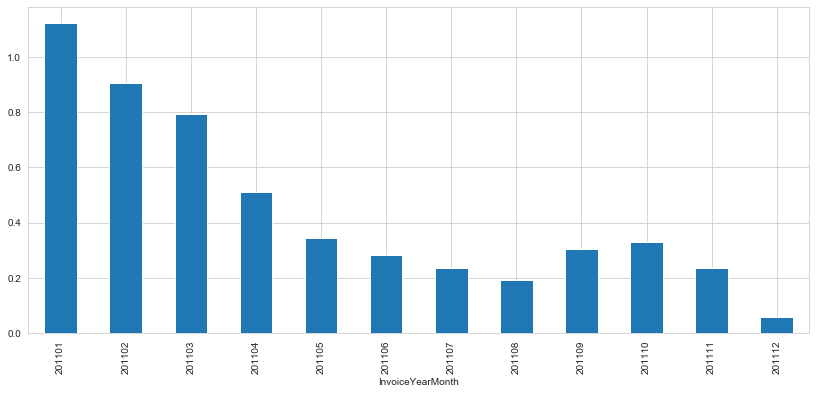

In [21]:
df_user_ratio.plot(kind="bar", legend=False, figsize=(14, 6))
plt.show()

In [22]:
df_user_purchase = df_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [23]:
months = df_retention.columns[2:]
retention_array = []

for i in range(len(months) - 1):
    retention_data = {}
    selected_month = months[i + 1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month] > 0) & (df_retention[prev_month] > 0)][selected_month].sum()
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201102,714,263
1,201103,923,305
2,201104,817,310
3,201105,985,369
4,201106,943,417


In [24]:
df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']
df_retention.head(10)

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


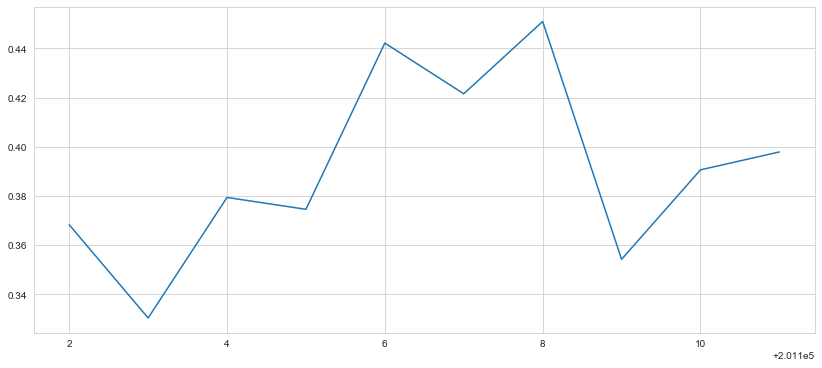

In [25]:
plt.figure(figsize=(14, 6))
plt.plot(df_retention.head(10)['InvoiceYearMonth'], df_retention.head(10)['RetentionRate'])
plt.show()